# Step1: Problem Statement

# Step 2:Import Libraries 

In [3]:
import pandas as pd # for Python DataScience Libraries to perform activity on DataFrames
import numpy as np # for numerical Operation 

import seaborn as sns
import matplotlib.pyplot as plt # for visualization 

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV #For Splitting data & Hyperparmeter Tunning

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score # For Evaluation of model 

from sklearn.linear_model import LogisticRegression #for Logestic Regression

from sklearn.neighbors import KNeighborsClassifier #for knn model

from sklearn.impute import KNNImputer # fill the missing value by Knn Imputer

from sklearn.tree import DecisionTreeClassifier,plot_tree# for Decion tree 
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier# For RF &AdaboostClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler # for Scaling the data

from statsmodels.stats.outliers_influence import variance_inflation_factor #To caluclate vif 

# Step 3: Data Gathering

In [75]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,102,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


# Step4: EDA

In [5]:
df.isna().sum()# To check the null values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info() #To check the Data types of all Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

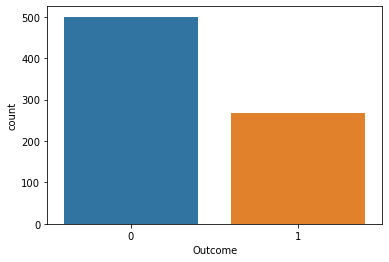

In [7]:
sns.countplot(x=df["Outcome"])

In [8]:
df["Outcome"].value_counts() #The Target column having not bancee data

0    500
1    268
Name: Outcome, dtype: int64

# Step 5: Feature Engineering

# Handling Outliers

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


## 1.Glucose

<AxesSubplot:xlabel='Glucose'>

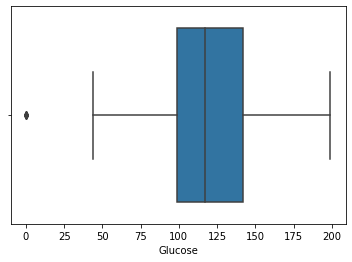

In [76]:
# outliers
sns.boxplot(df["Glucose"])

In [77]:
# def outliers(df):
Q1=df["Glucose"].quantile(0.25)
Q3=df["Glucose"].quantile(0.75)
IQR=Q3-Q1
upper_tail=Q3+IQR*1.5
lower_tail=Q1-IQR*1.5
df["Glucose"].loc[df["Glucose"]>upper_tail]=upper_tail
df["Glucose"].loc[df["Glucose"]>=upper_tail]
df["Glucose"].loc[df["Glucose"]<lower_tail]=lower_tail
df["Glucose"].loc[df["Glucose"]<=lower_tail]    

75     34.5
182    34.5
342    34.5
349    34.5
502    34.5
Name: Glucose, dtype: float64

<AxesSubplot:xlabel='Glucose'>

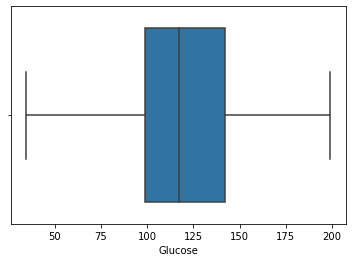

In [78]:
sns.boxplot(df["Glucose"])

# 2.BloodPressure

<AxesSubplot:xlabel='BloodPressure'>

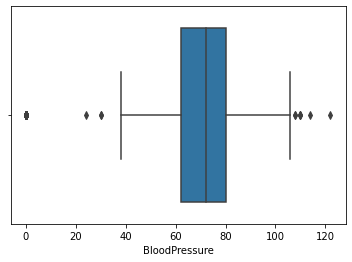

In [79]:
sns.boxplot(df["BloodPressure"])

In [80]:
Q1=df["BloodPressure"].quantile(0.25)
Q3=df["BloodPressure"].quantile(0.75)
IQR=Q3-Q1
upper_tail=Q3+IQR*1.5
lower_tail=Q1-IQR*1.5
mean=df["BloodPressure"].loc[(df["BloodPressure"]<upper_tail) |( df["SkinThickness"]>lower_tail)].mean()

print(df["BloodPressure"].loc[df["BloodPressure"]>=upper_tail])
df["BloodPressure"].loc[df["BloodPressure"]>upper_tail]=mean
print(df["BloodPressure"].loc[df["BloodPressure"]<=lower_tail])    
df["BloodPressure"].loc[df["BloodPressure"]<lower_tail]=mean
   

43     110
84     108
106    122
177    110
362    108
549    110
691    114
Name: BloodPressure, dtype: int64
7       0.0
15      0.0
18     30.0
49      0.0
60      0.0
78      0.0
81      0.0
125    30.0
172     0.0
193     0.0
222     0.0
261     0.0
266     0.0
269     0.0
300     0.0
332     0.0
336     0.0
347     0.0
357     0.0
426     0.0
430     0.0
435     0.0
453     0.0
468     0.0
484     0.0
494     0.0
522     0.0
533     0.0
535     0.0
589     0.0
597    24.0
601     0.0
604     0.0
619     0.0
643     0.0
697     0.0
703     0.0
706     0.0
Name: BloodPressure, dtype: float64


<AxesSubplot:xlabel='BloodPressure'>

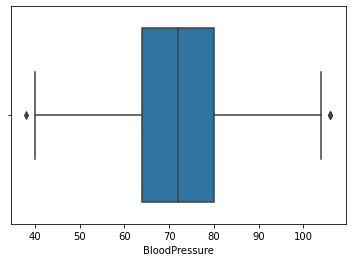

In [81]:
sns.boxplot(df["BloodPressure"])

# 3.Skinthickness

<AxesSubplot:xlabel='SkinThickness'>

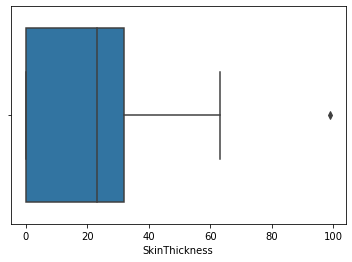

In [82]:
sns.boxplot(df["SkinThickness"])

In [83]:
Q1=df["SkinThickness"].quantile(0.25)
Q3=df["SkinThickness"].quantile(0.75)
IQR=Q3-Q1
upper_tail=Q3+IQR*1.5
lower_tail=Q1-IQR*1.5
mean=df["SkinThickness"].loc[(df["SkinThickness"]<upper_tail) |( df["SkinThickness"]>lower_tail)].mean()

print(df["SkinThickness"].loc[df["SkinThickness"]>=upper_tail])
df["SkinThickness"].loc[df["SkinThickness"]>upper_tail]=mean
print(df["SkinThickness"].loc[df["SkinThickness"]<=lower_tail])    
df["SkinThickness"].loc[df["BloodPressure"]<lower_tail]=mean
   

579    99
Name: SkinThickness, dtype: int64
Series([], Name: SkinThickness, dtype: float64)


<AxesSubplot:xlabel='SkinThickness'>

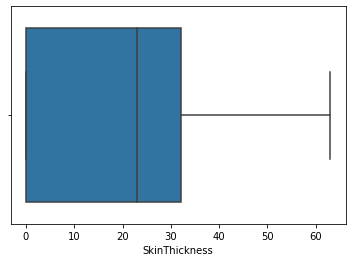

In [84]:
sns.boxplot(df["SkinThickness"])

# 4.Insulin

<AxesSubplot:xlabel='Insulin'>

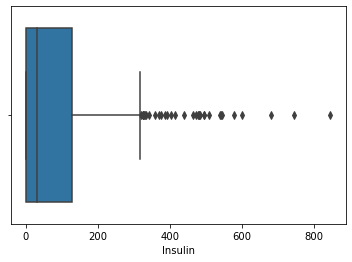

In [85]:
sns.boxplot(df["Insulin"])

In [86]:
Q1=df["Insulin"].quantile(0.25)
Q3=df["Insulin"].quantile(0.75)
IQR=Q3-Q1
upper_tail=Q3+IQR*1.5
lower_tail=Q1-IQR*1.5
mean=df["Insulin"].loc[(df["Insulin"]<upper_tail) |( df["Insulin"]>lower_tail)].mean()

print(df["Insulin"].loc[df["Insulin"]>=upper_tail])
df["Insulin"].loc[df["Insulin"]>upper_tail]=mean
print(df["Insulin"].loc[df["Insulin"]<=lower_tail])    
df["Insulin"].loc[df["Insulin"]<lower_tail]=mean

8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    326
574    330
584    600
612    321
645    440
655    540
695    480
707    335
710    387
715    392
753    510
Name: Insulin, dtype: int64
Series([], Name: Insulin, dtype: float64)


<AxesSubplot:xlabel='Insulin'>

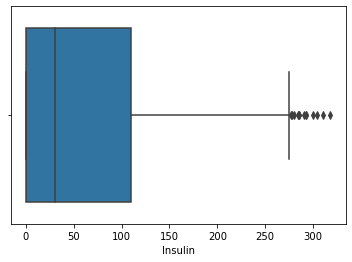

In [87]:
sns.boxplot(df["Insulin"])

#  5.BMI

<AxesSubplot:xlabel='BMI'>

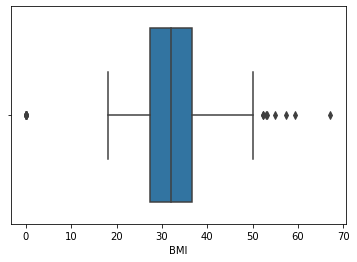

In [94]:
sns.boxplot(df["BMI"])

In [95]:
Q1=df["BMI"].quantile(0.25)
Q3=df["BMI"].quantile(0.75)
IQR=Q3-Q1
upper_tail=Q3+IQR*1.5
lower_tail=Q1-IQR*1.5
mean=df["BMI"].loc[(df["BMI"]<upper_tail) |( df["BMI"]>lower_tail)].mean()

print(df["BMI"].loc[df["BMI"]>=upper_tail])
df["BMI"].loc[df["BMI"]>upper_tail]=mean
print(df["BMI"].loc[df["BMI"]<=lower_tail])    
df["BMI"].loc[df["BMI"]<lower_tail]=mean

120    53.2
125    55.0
177    67.1
193    52.3
247    52.3
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64
9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64


<AxesSubplot:xlabel='BMI'>

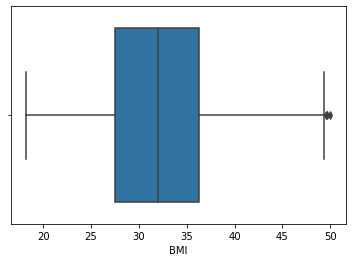

In [96]:
sns.boxplot(df["BMI"])

# 6.DiabetesPedigreeFunction

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

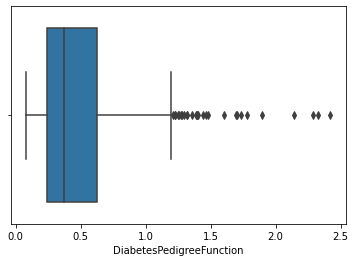

In [97]:
sns.boxplot(df["DiabetesPedigreeFunction"])

In [103]:
Q1=df["DiabetesPedigreeFunction"].quantile(0.25)
Q3=df["DiabetesPedigreeFunction"].quantile(0.75)
IQR=Q3-Q1
upper_tail=Q3+IQR*1.5
lower_tail=Q1-IQR*1.5
mean=df["DiabetesPedigreeFunction"].loc[(df["DiabetesPedigreeFunction"]<upper_tail) |( df["DiabetesPedigreeFunction"]>lower_tail)].mean()

print(df["DiabetesPedigreeFunction"].loc[df["DiabetesPedigreeFunction"]>=upper_tail])
df["DiabetesPedigreeFunction"].loc[df["DiabetesPedigreeFunction"]>upper_tail]=mean
print(df["DiabetesPedigreeFunction"].loc[df["DiabetesPedigreeFunction"]<=lower_tail])    
df["DiabetesPedigreeFunction"].loc[df["DiabetesPedigreeFunction"]<lower_tail]=mean

220    1.072
412    1.076
546    1.034
755    1.057
Name: DiabetesPedigreeFunction, dtype: float64
Series([], Name: DiabetesPedigreeFunction, dtype: float64)


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

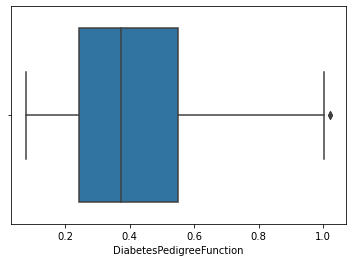

In [104]:
sns.boxplot(df["DiabetesPedigreeFunction"])

# 7.Age

<AxesSubplot:xlabel='Age'>

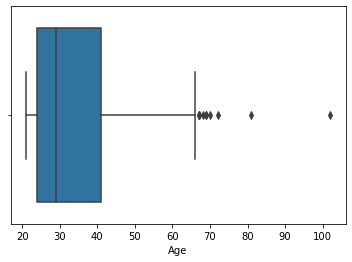

In [102]:
sns.boxplot(df["Age"])

In [105]:
Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
IQR=Q3-Q1
upper_tail=Q3+IQR*1.5
lower_tail=Q1-IQR*1.5
mean=df["Age"].loc[(df["Age"]<upper_tail) |( df["Age"]>lower_tail)].mean()

print(df["Age"].loc[df["Age"]>=upper_tail])
df["Age"].loc[df["Age"]>upper_tail]=mean
print(df["Age"].loc[df["Age"]<=lower_tail])    
df["Age"].loc[df["Age"]<lower_tail]=mean

2      102
123     69
363     67
453     72
459     81
489     67
537     67
666     70
674     68
684     69
Name: Age, dtype: int64
Series([], Name: Age, dtype: float64)


<AxesSubplot:xlabel='Age'>

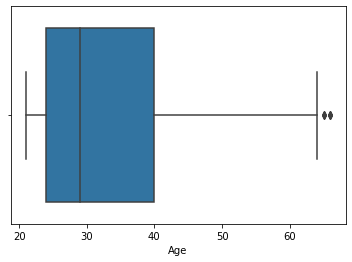

In [106]:
sns.boxplot(df["Age"])

<AxesSubplot:>

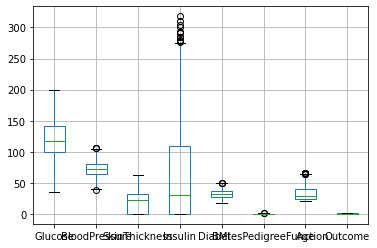

In [107]:
df.boxplot()

# Step 6 Feature Selection

In [109]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.203608,0.041144,0.219009,0.221857,0.051161,0.263892,0.474917
BloodPressure,0.203608,1.000000,0.038158,-0.039357,0.268667,-0.000666,0.326116,0.156392
SkinThickness,0.041144,0.038158,1.000000,0.495647,0.373659,0.153219,-0.110076,0.067066
Insulin,0.219009,-0.039357,0.495647,1.000000,0.181564,0.200904,-0.073744,0.090678
BMI,0.221857,0.268667,0.373659,0.181564,1.000000,0.093317,0.075782,0.300611
DiabetesPedigreeFunction,0.051161,-0.000666,0.153219,0.200904,0.093317,1.000000,0.017114,0.140705
Age,0.263892,0.326116,-0.110076,-0.073744,0.075782,0.017114,1.000000,0.262699
Outcome,0.474917,0.156392,0.067066,0.090678,0.300611,0.140705,0.262699,1.000000


# step 7 Model Training

In [112]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
x
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)
y_train

14     1
237    1
412    0
625    0
537    0
      ..
41     0
324    0
59     0
452    0
200    0
Name: Outcome, Length: 537, dtype: int64

# model_training

In [118]:
log_clf=LogisticRegression(random_state=20)
log_clf.fit(x_train,y_train)



LogisticRegression(random_state=20)

# Modal Evaluation

In [119]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = log_clf.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[136  14]
 [ 37  44]]
**********************************************************************
Accuracy Score : 0.7792207792207793
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.54      0.63        81

    accuracy                           0.78       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231

**********************************************************************


In [120]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = log_clf.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[305  45]
 [ 87 100]]
**********************************************************************
Accuracy Score : 0.7541899441340782
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       350
           1       0.69      0.53      0.60       187

    accuracy                           0.75       537
   macro avg       0.73      0.70      0.71       537
weighted avg       0.75      0.75      0.75       537

**********************************************************************


# Oversampling Then logestic Regression

In [123]:
from imblearn.over_sampling import SMOTE


In [124]:
over_sample=SMOTE(sampling_strategy=1.0)
x1,y1=over_sample.fit_resample(x,y)

1    500
0    500
Name: Outcome, dtype: int64

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=20)
y_train

140    0
409    1
63     0
178    0
732    1
      ..
924    1
223    0
271    0
474    0
355    1
Name: Outcome, Length: 700, dtype: int64

In [131]:
y_train.value_counts()

1    359
0    341
Name: Outcome, dtype: int64

In [132]:
y_test.value_counts()

0    159
1    141
Name: Outcome, dtype: int64

In [133]:
log_clf=LogisticRegression(random_state=20)
log_clf.fit(x_train,y_train)

LogisticRegression(random_state=20)

In [134]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = log_clf.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[123  36]
 [ 37 104]]
**********************************************************************
Accuracy Score : 0.7566666666666667
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       159
           1       0.74      0.74      0.74       141

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

**********************************************************************


In [135]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = log_clf.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[254  87]
 [ 93 266]]
**********************************************************************
Accuracy Score : 0.7428571428571429
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.74      0.74       341
           1       0.75      0.74      0.75       359

    accuracy                           0.74       700
   macro avg       0.74      0.74      0.74       700
weighted avg       0.74      0.74      0.74       700

**********************************************************************


# Scaling to Linear Regression

In [137]:
normaliztion_saclar=MinMaxScaler()
normaliztion_saclar.fit(x1,y1)

MinMaxScaler()

In [141]:
normalized_array=normaliztion_saclar.transform(x1)
x1=pd.DataFrame(normalized_array,columns=x1.columns)

In [142]:
x1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.689970,0.176471,0.555556,0.000000,0.484277,0.581568,0.644444
1,0.306991,0.411765,0.460317,0.000000,0.264151,0.289195,0.222222
2,0.902736,0.382353,0.000000,0.000000,0.160377,0.629237,0.273524
3,0.702128,0.411765,0.365079,0.295597,0.311321,0.094280,0.000000
4,0.702128,0.029412,0.555556,0.528302,0.783019,0.417242,0.266667
...,...,...,...,...,...,...,...
995,0.486023,0.481914,0.000000,0.000000,0.445019,0.198801,0.157283
996,0.639426,0.559448,0.000000,0.000000,0.671220,0.777157,0.060795
997,0.453994,0.453206,0.000000,0.000000,0.454625,0.711790,0.319198
998,0.663414,0.795667,0.528822,0.477987,0.516057,0.359382,0.680701


In [143]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=20)

In [144]:
log_clf1=LogisticRegression(random_state=20)
log_clf1.fit(x_train,y_train)

LogisticRegression(random_state=20)

In [145]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = log_clf.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[159   0]
 [141   0]]
**********************************************************************
Accuracy Score : 0.53
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.53      1.00      0.69       159
           1       0.00      0.00      0.00       141

    accuracy                           0.53       300
   macro avg       0.27      0.50      0.35       300
weighted avg       0.28      0.53      0.37       300

**********************************************************************


In [146]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = log_clf.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[341   0]
 [359   0]]
**********************************************************************
Accuracy Score : 0.48714285714285716
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       341
           1       0.00      0.00      0.00       359

    accuracy                           0.49       700
   macro avg       0.24      0.50      0.33       700
weighted avg       0.24      0.49      0.32       700

**********************************************************************


In [147]:
y_train.value_counts()

1    359
0    341
Name: Outcome, dtype: int64

# KNN-Classifier Regression 

In [148]:
knn_regresor_model=KNeighborsClassifier()
knn_regresor_model.fit(x_train,y_train)

KNeighborsClassifier()

In [150]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = knn_regresor_model.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[110  49]
 [ 18 123]]
**********************************************************************
Accuracy Score : 0.7766666666666666
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.69      0.77       159
           1       0.72      0.87      0.79       141

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300

**********************************************************************


In [151]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = knn_regresor_model.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[257  84]
 [ 23 336]]
**********************************************************************
Accuracy Score : 0.8471428571428572
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       341
           1       0.80      0.94      0.86       359

    accuracy                           0.85       700
   macro avg       0.86      0.84      0.85       700
weighted avg       0.86      0.85      0.85       700

**********************************************************************


# KNN Without Sampling & Normalization

In [166]:
normaliztion_saclar=MinMaxScaler()
normaliztion_saclar.fit(x,y)

MinMaxScaler()

In [167]:
normalized_array=normaliztion_saclar.transform(x)
x=pd.DataFrame(normalized_array,columns=x.columns)

In [168]:
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.689970,0.176471,0.555556,0.000000,0.484277,0.581568,0.644444
1,0.306991,0.411765,0.460317,0.000000,0.264151,0.289195,0.222222
2,0.902736,0.382353,0.000000,0.000000,0.160377,0.629237,0.273524
3,0.702128,0.411765,0.365079,0.295597,0.311321,0.094280,0.000000
4,0.702128,0.029412,0.555556,0.528302,0.783019,0.417242,0.266667
...,...,...,...,...,...,...,...
763,0.404255,0.558824,0.761905,0.566038,0.462264,0.098517,0.933333
764,0.531915,0.470588,0.428571,0.000000,0.584906,0.277542,0.133333
765,0.525836,0.500000,0.365079,0.352201,0.251572,0.176907,0.200000
766,0.556231,0.323529,0.000000,0.000000,0.374214,0.287076,0.577778


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [172]:
knn_regresor_model=KNeighborsClassifier()
knn_regresor_model.fit(x_train,y_train)

KNeighborsClassifier()

In [173]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = knn_regresor_model.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[124  29]
 [ 36  42]]
**********************************************************************
Accuracy Score : 0.7186147186147186
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       153
           1       0.59      0.54      0.56        78

    accuracy                           0.72       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.71      0.72      0.72       231

**********************************************************************


In [174]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = knn_regresor_model.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[299  48]
 [ 53 137]]
**********************************************************************
Accuracy Score : 0.8119180633147114
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       347
           1       0.74      0.72      0.73       190

    accuracy                           0.81       537
   macro avg       0.79      0.79      0.79       537
weighted avg       0.81      0.81      0.81       537

**********************************************************************


# Descion Tree

In [176]:
dt_clf=DecisionTreeClassifier(random_state=20)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [177]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = dt_clf.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[113  40]
 [ 37  41]]
**********************************************************************
Accuracy Score : 0.6666666666666666
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       153
           1       0.51      0.53      0.52        78

    accuracy                           0.67       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.67      0.67      0.67       231

**********************************************************************


In [178]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = dt_clf.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[347   0]
 [  0 190]]
**********************************************************************
Accuracy Score : 1.0
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       190

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

**********************************************************************


# Descion Tree with Hyper parameter

In [183]:
dt_clf=DecisionTreeClassifier(random_state=20)
Hyper={"criterion":["gini", "entropy", "log_loss"],
       "max_depth":np.arange(0,15),
       "min_samples_leaf":np.arange(0,15),
       "min_samples_split":np.arange(0,15)
    }
rmcv_clr=RandomizedSearchCV(dt_clf,Hyper,cv=5)
rmcv_clr.fit(x_train,y_train)
rmcv_clr.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=11,
                       min_samples_split=4, random_state=20)

In [186]:
dt_clf=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=11,
                       min_samples_split=4, random_state=20)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=11,
                       min_samples_split=4, random_state=20)

In [187]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = dt_clf.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[119  34]
 [ 35  43]]
**********************************************************************
Accuracy Score : 0.7012987012987013
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       153
           1       0.56      0.55      0.55        78

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231

**********************************************************************


In [188]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = dt_clf.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[303  44]
 [ 59 131]]
**********************************************************************
Accuracy Score : 0.8081936685288641
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       347
           1       0.75      0.69      0.72       190

    accuracy                           0.81       537
   macro avg       0.79      0.78      0.79       537
weighted avg       0.81      0.81      0.81       537

**********************************************************************


In [190]:
plt.figure(figsize=(200,160))
plot_tree(dt_clf,feature_names=x.columns,class_names=["0","1"],filled=True)
plt.savefig("DecionTree.jpg")

# Random Forest

In [192]:
rf_clr=RandomForestClassifier(random_state=20)
rf_clr.fit(x_train,y_train)

RandomForestClassifier(random_state=20)

In [193]:
# Testing Data Accuracy
y_pred = rf_clr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[132  21]
 [ 34  44]]
**************************************************
Accuracy Score is : 0.7619047619047619
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       153
           1       0.68      0.56      0.62        78

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.76       231



In [194]:
# Training Data Accuracy
y_pred_train = rf_clr.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[347   0]
 [  0 190]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       190

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

